In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [88]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [89]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [91]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


1. What is the distribution of age among heart failure patients in the dataset?

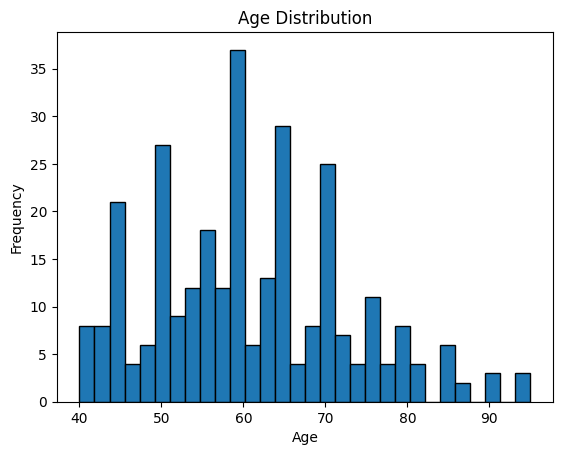

In [92]:
plt.hist(df.age, bins=30, edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.show()

INSIGHTS: 1. Most of the patients have age between 50 to 70 years
          2. Most occuring age is around 60 years

2. How does the death rate vary with age?

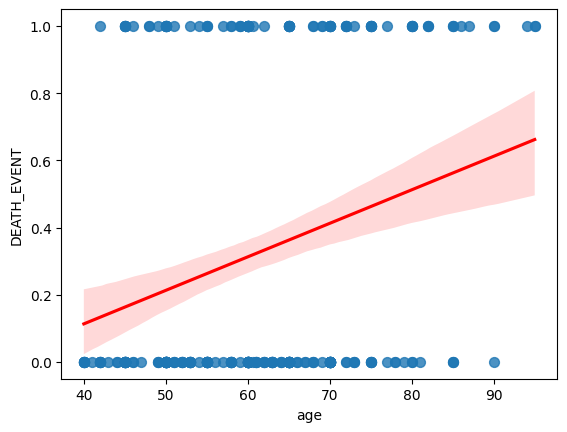

In [93]:
sns.regplot(x=df.age, y=df.DEATH_EVENT, data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.show()

INSIGHTS: Chances of Death Event increases with age linearly 

3. What is the percentage of male and female patients in the dataset?

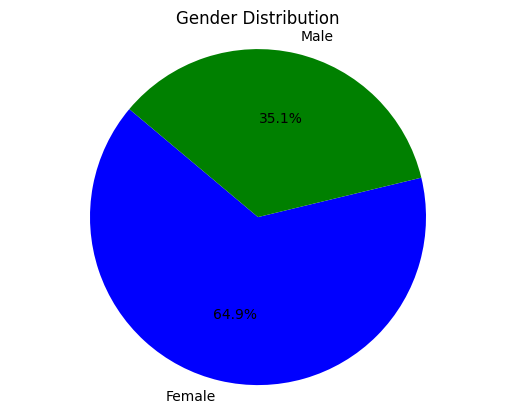

In [94]:
gender_counts = df['sex'].value_counts()

sizes = gender_counts.values
labels = ['Female', 'Male']
colors = ['blue', 'green']  # Blue for Female and Green for Male

# Plotting
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Gender Distribution')
plt.show()

INSIGHTS: 1. Number of female patients are greater than male patients

4. How does the platelet count vary among different age groups?

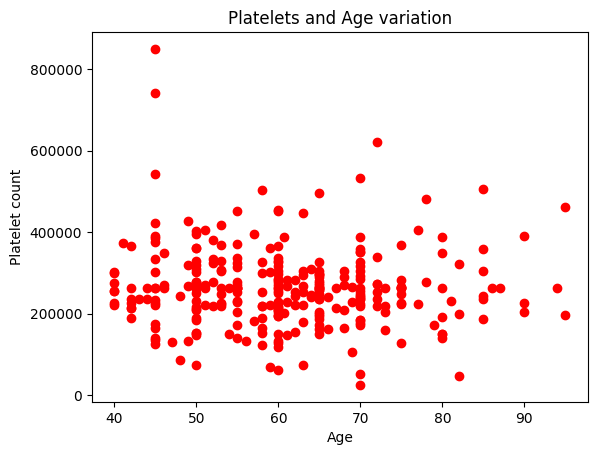

In [95]:
plt.scatter( df.age, df.platelets, color="red")
plt.xlabel("Age")
plt.ylabel("Platelet count")
plt.title("Platelets and Age variation")
plt.show()

1. Plateletes count is most at the age 45
2. Patient with least platelet count is of 70 years old
3. Average platelet count is around 250000

5. Is there a correlation between creatinine and sodium level in the blood?

In [96]:
correlation = df.serum_creatinine.corr(df.serum_sodium)
print(f"Correlation between creatinine level and sodium level in blood is: {correlation}")
print("Weak Negative relation is present between creatinine level and sodium level in blood")

Correlation between creatinine level and sodium level in blood is: -0.18909521009117414
Weak Negative relation is present between creatinine level and sodium level in blood


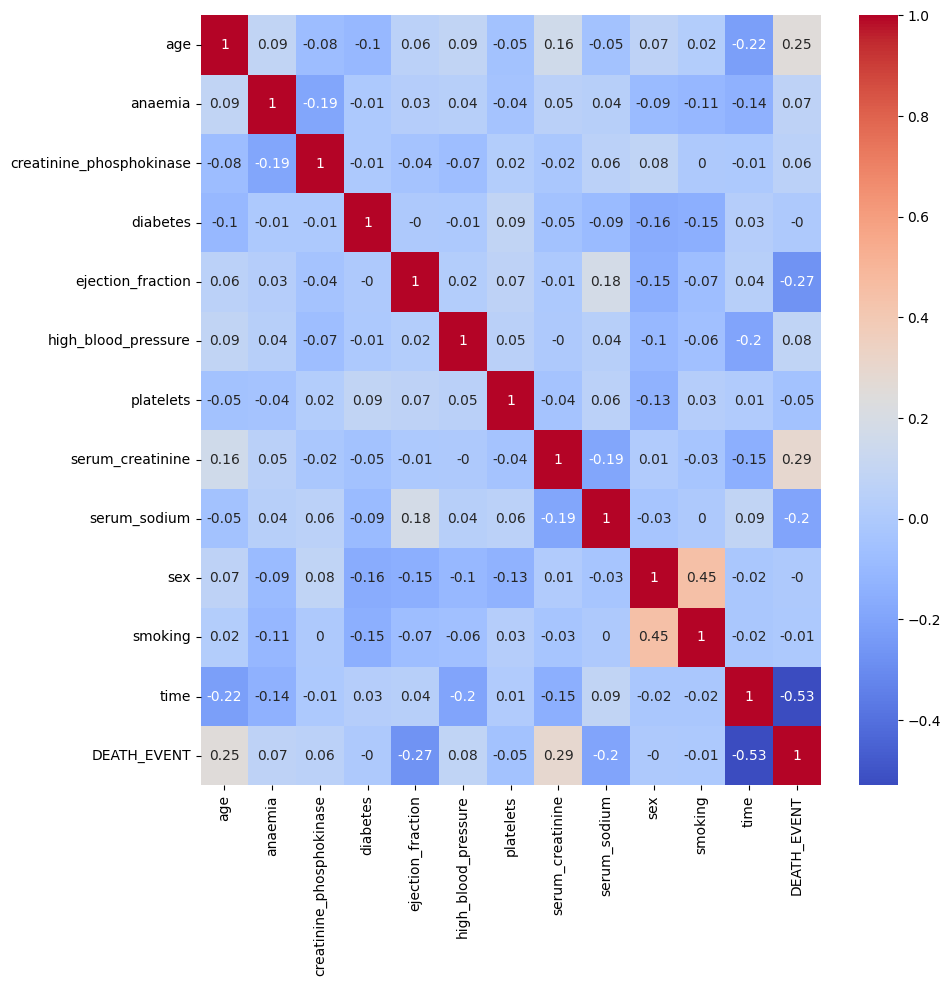

In [97]:
correlation = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation.round(2), annot = True, cmap = 'coolwarm')
plt.show()

6. how does the prevalence of high blood pressure differ in male and female patients?

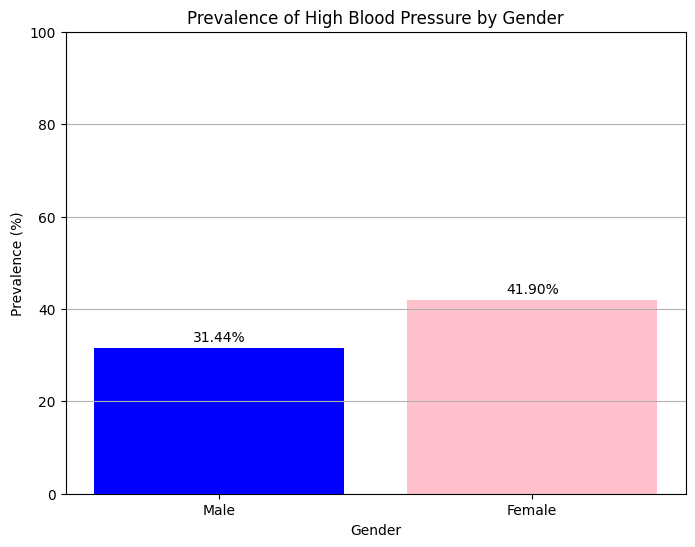

In [98]:
male_prevalence = df[df['sex'] == 1]['high_blood_pressure'].mean() * 100
female_prevalence = df[df['sex'] == 0]['high_blood_pressure'].mean() * 100

# Data for plotting
categories = ['Male', 'Female']
prevalence = [male_prevalence, female_prevalence]

# Create bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, prevalence, color=['blue', 'pink'])

# Add text annotations on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}%', 
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), 
                 textcoords="offset points",
                 ha='center', va='bottom')

# Customize plot
plt.title('Prevalence of High Blood Pressure by Gender')
plt.xlabel('Gender')
plt.ylabel('Prevalence (%)')
plt.ylim(0, 100) 
plt.grid(axis='y')

plt.show()

1. Prevalence of High blood pressure by gender is greater in female

7. What is the relationship between smoking habits and occurrence of heart failure

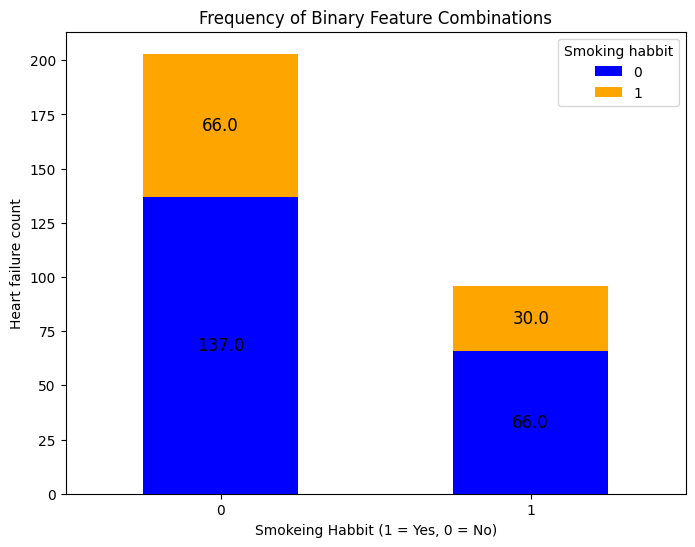

In [103]:
contingency_table = pd.crosstab(df.smoking, df.DEATH_EVENT)
ax = contingency_table.plot(kind='bar', stacked=True, color=['blue', 'orange'], figsize=(8, 6))
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center', fontsize=12)

plt.title('Frequency of Binary Feature Combinations')
plt.xlabel('Smokeing Habbit (1 = Yes, 0 = No)')
plt.ylabel('Heart failure count')
plt.xticks(rotation=0)
plt.legend(title='Smoking habbit')
plt.show()

8. Are there any noticeable patterns in the distribution of death events across different age groups

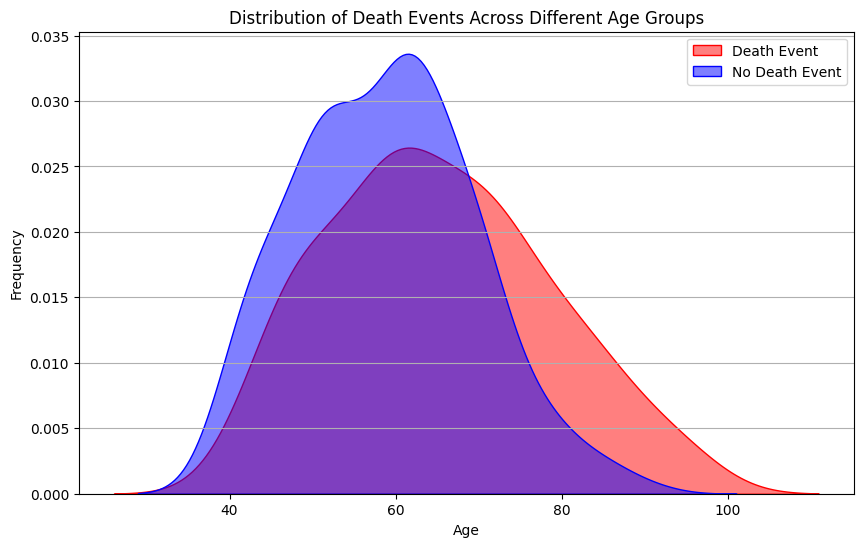

In [104]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['DEATH_EVENT'] == 1]['age'],color='red', alpha=0.5, label='Death Event', shade=True)
sns.kdeplot(df[df['DEATH_EVENT'] == 0]['age'],color='blue', alpha=0.5, label='No Death Event', shade=True)
plt.title('Distribution of Death Events Across Different Age Groups')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y')

plt.show()


1. Most of the death occur at the age of 60 to 80 years
2. No death event frequency is highest at 60 year old patients

9. Is there any significance difference between ejection fraction between patients with and without diabetes?

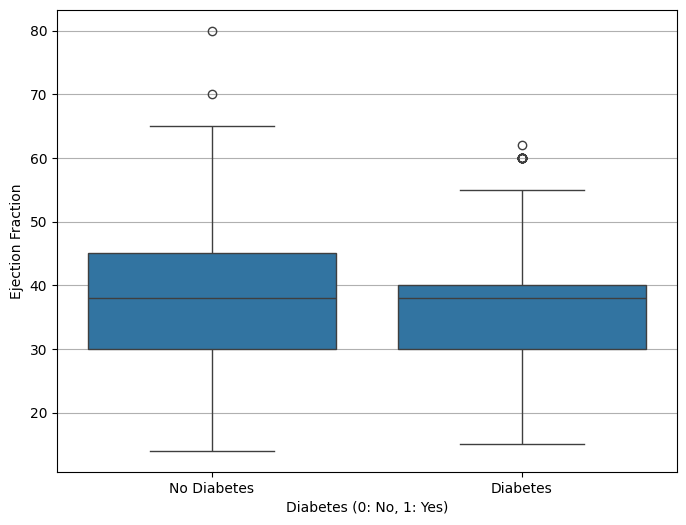

In [101]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df.diabetes, y=df.ejection_fraction, data=df)
plt.xlabel('Diabetes (0: No, 1: Yes)')
plt.ylabel('Ejection Fraction')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.grid(axis='y')
plt.show()

1. Ejection Fraction is higher in non-diabetic patients than diabetic patients
2. IQR (Inter-Quartile range) is greater in diabetic patients

10. How does the serum creatinine level vary between patients who survived and who didn't?

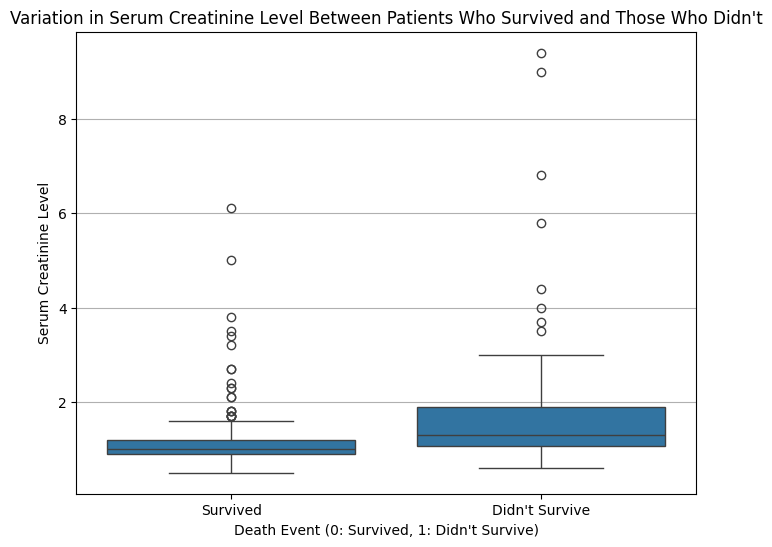

In [107]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=df)
plt.title('Variation in Serum Creatinine Level Between Patients Who Survived and Those Who Didn\'t')
plt.xlabel('Death Event (0: Survived, 1: Didn\'t Survive)')
plt.ylabel('Serum Creatinine Level')
plt.xticks([0, 1], ['Survived', 'Didn\'t Survive'])
plt.grid(axis='y')
plt.show()

Serum Creatinine level was higher in the patients who didn't survived